# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [149]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [150]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [151]:
Boston.describe(include="all")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'lstat'}>],
       [<Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

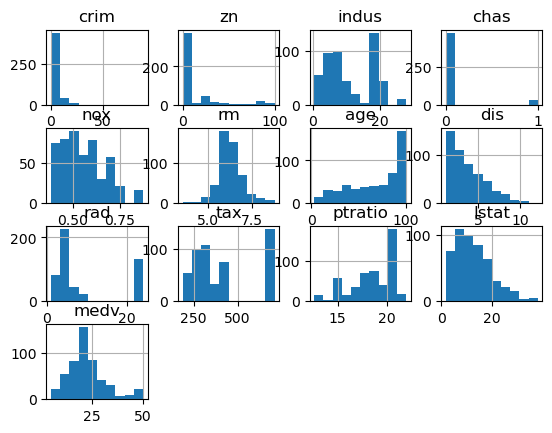

In [154]:
Boston.hist()

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

`medv: It is the target variable. This variable represents the median value of owner-occupied homes in thousands of dollars.`

`dis: It is the predictor or feature, a variable that is used to predict the value of the target variable. This variable represents the weighted distance to five Boston employment centers. The weights are based on the proportion of employees in the city that work in that employment center. So, a higher value of 'dis' likely indicates a property further away from major employment hubs.`

_(ii)_ What concept ‘defines’ the plotted line?

`The plotted line in this code is defined by the concept of linear regression, the plotted line represents the relashionship between target variable and predictors`

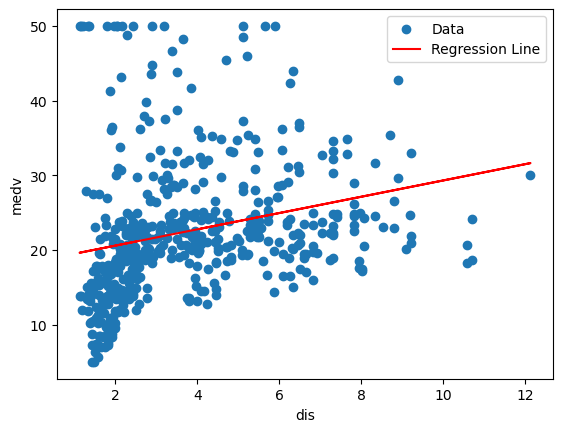

In [141]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

`Null Hypothesis (H0): there is NO linear relationship between the distance from employment centers and the median value of homes.`

`Alternative Hypothesis (H₁):there IS linear relationship between the distance from employment centers and the median value of homes.`

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [143]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'rm': Boston['dis']})
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))
print(results.conf_int())
print(results.summary())

              coef  std err       t  P>|t|
intercept  18.3901    0.817  22.499    0.0
rm          1.0916    0.188   5.795    0.0
                   0          1
intercept  16.784179  19.995997
rm          0.721509   1.461717
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.21e-08
Time:                        22:27:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                           

/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):
 
_(v)_What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?

$B_0$`: 18.3901`
$B_1$`: 1.0916`

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

$B_0$`: 0.817`
$B_1$`: 0.188`

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

$B_0$`: 16.784179  -	19.995997`
$B_1$`: 0.721509   -	1.461717`



Now, let's interpret the model output.  

_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
`NO`
`only 6.2% of the variation in median value is explained by the linear relationship with distance`

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

`YES, we reject the null hypothesis.
Since the F-statistic is high (33.58) and the p-value is very small (1.21e-08), we can reject the null hypothesis. 
The model with the distance variable (dis) provides a statistically significant improvement over a model with only the intercept. This suggests that there's a statistically significant relationship between distance and median value in the Boston housing data.`

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [147]:
y = Boston['medv']
X = MS(['dis', 'rm']).fit_transform(Boston)
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1))

              coef  std err       t  P>|t|
intercept -34.6361    2.621 -13.212  0.000
dis         0.4888    0.141   3.459  0.001
rm          8.8014    0.424  20.780  0.000


/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


In [122]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.84e-75
Time:                        19:02:43   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

`Null Hypothesis (H₀):`

`There is no statistically significant linear relationship between the combined effects of distance (dis) and number of rooms (rm) and the median value of housing (medv).`

`Alternative Hypothesis (H₁):`

`There is at least one statistically significant linear relationship between combined effects of distance (dis) and number of rooms (rm) and the median value of housing (medv).`

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

`YES, both 'dis' and 'rm' are predictive of 'medv'`

`p-value of 'dis' : 0.001`
`p-value of 'rm'  : 0.000`

`p-value represents how likely it is that the observed effect between 'dis', 'rm' and 'medv', occurred by random chance alone if there's truly no relationship between the variables 'dis' and 'rm' (as stated by the null hypothesis).  In this case We reject the Null hypothesis and the predictor variables 'dis' and 'rm' have a statistically significant effect on the response variable 'medv'`

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

`Residual vs Fitted: Outliers are data points with residuals or errors that fall far away from the horizontal line at zero (either very high positive or very low negative values). These might be potential outliers.`

`Not all Outliers are bad, if they are genuine observations removing them might bias the model towards the majority`

/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


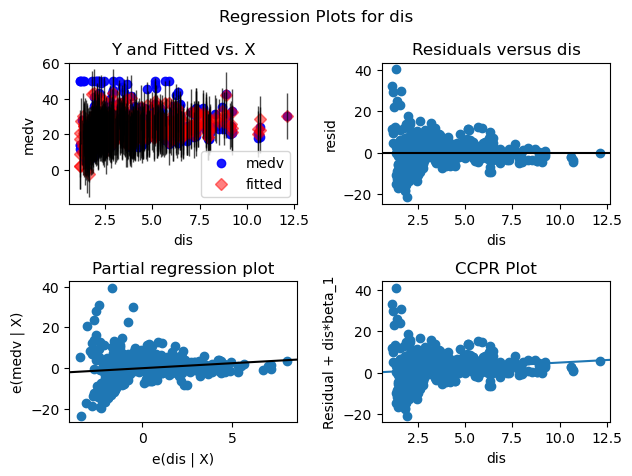

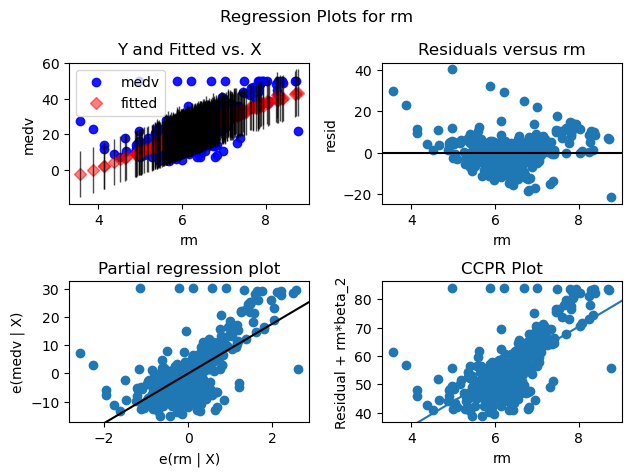

In [127]:
# Add your code here
fig_dis = sm.graphics.plot_regress_exog(results1, 'dis')
fig_dis.tight_layout(pad=1.0)

fig_rm = sm.graphics.plot_regress_exog(results1, 'rm')
fig_rm.tight_layout(pad=1.0)

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [148]:
# Add your code here
y = Boston['medv']
X = MS(['dis', 'rm']).fit_transform(Boston)
X = sm.add_constant(X)
X['interaction'] = X['dis'] * X['rm']

model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1))

                coef  std err      t  P>|t|
intercept   -15.2533    4.895 -3.116  0.002
dis          -5.7579    1.350 -4.265  0.000
rm            5.7020    0.785  7.263  0.000
interaction   0.9855    0.212  4.652  0.000


/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/nrojas/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


`Interaction Term Coefficient: The coefficient for the 'interaction' term is 0.9855.`
`Significance: The p-value (P>|t|) associated with the interaction term is 0.000, which is less than the common significance level of 0.05. This indicates a statistically significant interaction effect.`

`Interpretation: Since the coefficient for the interaction term is positive (0.9855), it suggests that the effect of distance on median housing value (medv) strengthens as the number of rooms (rm) increases. In other words, as the number of rooms in a house goes up, the negative impact of farther distance on housing value becomes more pronounced.`

`Concise Interpretation: There's a statistically significant interaction between distance and the number of rooms. Homes with more rooms seem to be more sensitive to the negative effect of distance on their value compared to houses with fewer rooms.`

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
